In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Read in csv
df = pd.read_csv('../Madison/Resources/NorCal.csv')
df

,Unnamed: 0,Year,State,Region,County,Median Income,Median Housing Price
0,0,2018,California,NorCal,Lake County,48554,269408.333333
1,1,2018,California,NorCal,Merced County,57745,268086.666667
2,2,2018,California,NorCal,Stanislaus County,60321,312658.333333
3,4,2018,California,NorCal,Sacramento County,69767,365454.166667
4,5,2018,California,NorCal,El Dorado County,82742,491687.416667
...,...,...,...,...,...,...,...
116,151,2022,California,NorCal,Sutter County,65018,431525.000000
117,152,2022,California,NorCal,Tehama County,58884,327394.166667
118,153,2022,California,NorCal,Tulare County,64722,357455.833333
119,155,2022,California,NorCal,Yolo County,83875,623743.333333


In [48]:
# Drop outlier counties with missing year data
df = df[~(df['County'].isin(['San Benito County', 'Tehama County']))]
(df.groupby('County')['Year'].count()!=4).sum()

0

In [49]:
# Check new county count per year
df.groupby('Year')['County'].count()

Year
2018    29
2019    29
2021    29
2022    29
Name: County, dtype: int64

In [50]:
# Ensure the order of county names is same for each year
df = df.sort_values(['Year', 'County'])

In [51]:
df_2018 = df.loc[df['Year']==2018, ['County', 'Median Income', 'Median Housing Price']]
df_2019 = df.loc[df['Year']==2019, ['County', 'Median Income', 'Median Housing Price']]
df_2021 = df.loc[df['Year']==2021, ['County', 'Median Income', 'Median Housing Price']]
df_2022 = df.loc[df['Year']==2022, ['County', 'Median Income', 'Median Housing Price']]

In [52]:
# Confirm that county names appear in same order for each year
((df_2018['County'].to_numpy()==df_2019['County'].to_numpy())
&(df_2018['County'].to_numpy()==df_2021['County'].to_numpy())
&(df_2018['County'].to_numpy()==df_2022['County'].to_numpy())).sum()

29

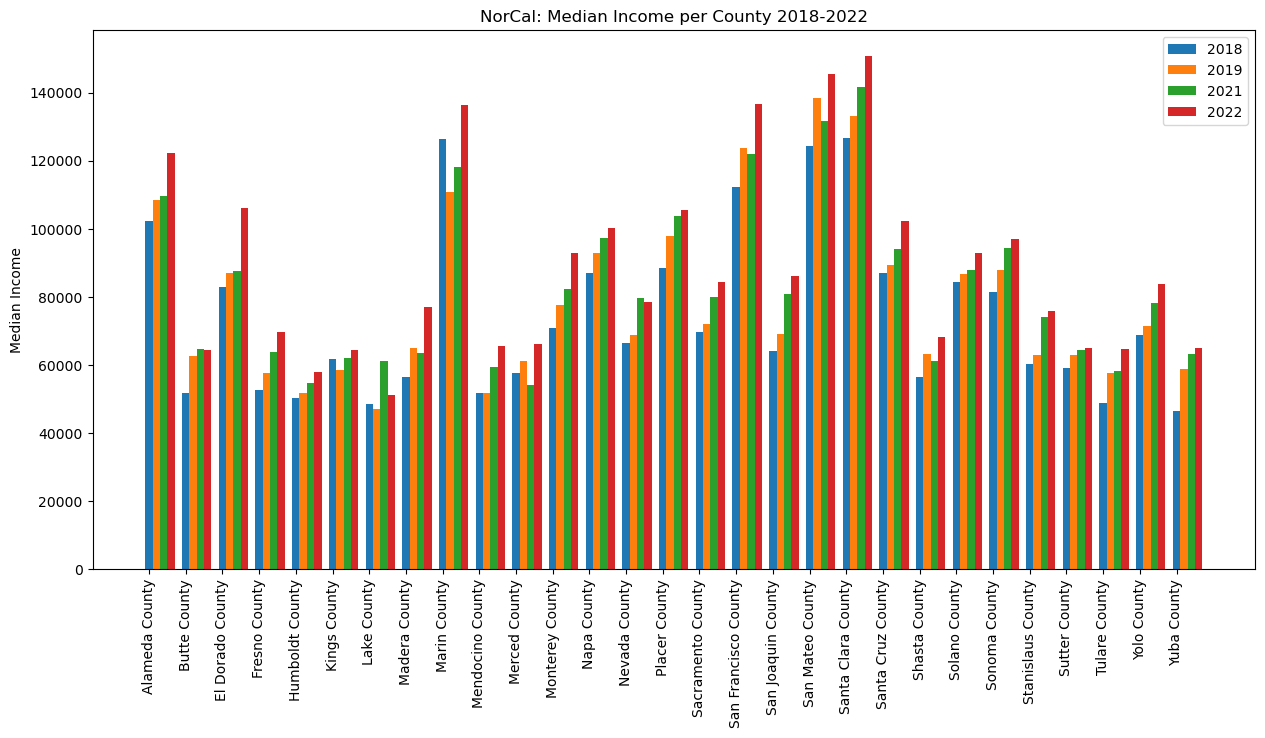

In [53]:
#Bar Chart - Norcal: Median Income Per County 2018-2022
x_axis = np.arange(len(df_2018))*1.5
labels = df_2018['County']
plt.figure(figsize=(15,7))
plt.bar(x_axis, df_2018['Median Income'], width=0.3)
plt.bar(x_axis+0.3, df_2019['Median Income'], width=0.3)
plt.bar(x_axis+0.6, df_2021['Median Income'], width=0.3)
plt.bar(x_axis+0.9, df_2022['Median Income'], width=0.3)
plt.xticks(x_axis, labels, rotation='vertical');
plt.ylabel('Median Income')
plt.title('NorCal: Median Income per County 2018-2022')
plt.legend(['2018','2019','2021','2022'])

plt.savefig('../Madison/Images/norcal_barchart_income.png')

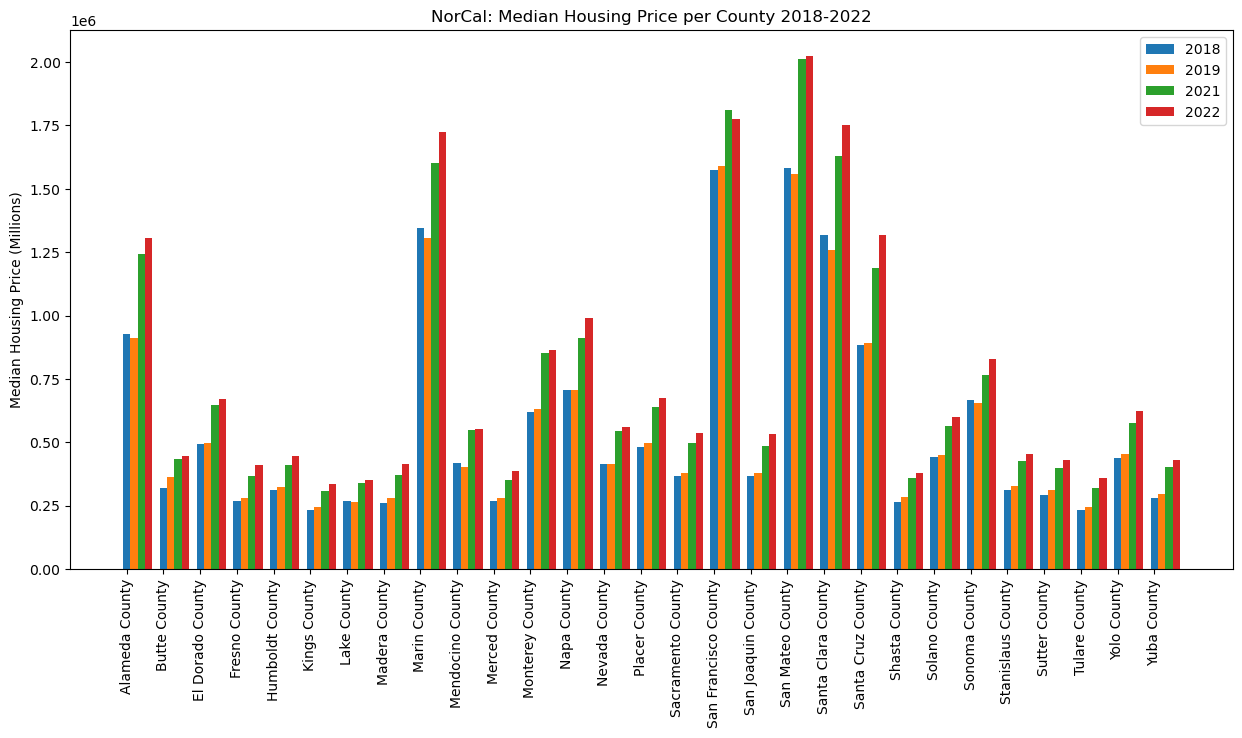

In [54]:
#Bar Chart - Norcal: Median Housing Price Per County 2018-2022
x_axis = np.arange(len(df_2018))*1.5
labels = df_2018['County']
plt.figure(figsize=(15,7))
plt.bar(x_axis, df_2018['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.3, df_2019['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.6, df_2021['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.9, df_2022['Median Housing Price'], width=0.3)
plt.xticks(x_axis, labels, rotation='vertical');
plt.yticks()
plt.ylabel('Median Housing Price (Millions)')
plt.title('NorCal: Median Housing Price per County 2018-2022')
plt.legend(['2018','2019','2021','2022'])

plt.savefig('../Madison/Images/norcal_barchart_housingprice.png')

In [55]:
#SoCal
socal_df = pd.read_csv('../Madison/Resources/SoCal.csv')
socal_df


,Year,State,Region,County,Median Income,Median Housing Price
0,2018,California,SoCal,Santa Barbara County,77472,6.627292e+05
1,2018,California,SoCal,San Diego County,79079,6.312833e+05
2,2018,California,SoCal,Riverside County,66964,4.015933e+05
3,2018,California,SoCal,San Bernardino County,63857,2.890500e+05
4,2018,California,SoCal,San Luis Obispo County,71148,6.164721e+05
5,2018,California,SoCal,Kern County,51579,2.398650e+05
6,2018,California,SoCal,Orange County,89759,8.153192e+05
7,2018,California,SoCal,Ventura County,84566,6.540058e+05
8,2018,California,SoCal,Los Angeles County,68093,5.723500e+05
9,2019,California,SoCal,Los Angeles County,72797,5.918633e+05


In [56]:
# Check new county count per year
socal_df.groupby('Year')['County'].count()

Year
2018    9
2019    9
2021    9
2022    9
Name: County, dtype: int64

In [57]:
# Ensure the order of county names is same for each year
socal_df = socal_df.sort_values(['Year', 'County'])

In [58]:
socal_df_2018 = socal_df.loc[socal_df['Year']==2018, ['County', 'Median Income', 'Median Housing Price']]
socal_df_2019 = socal_df.loc[socal_df['Year']==2019, ['County', 'Median Income', 'Median Housing Price']]
socal_df_2021 = socal_df.loc[socal_df['Year']==2021, ['County', 'Median Income', 'Median Housing Price']]
socal_df_2022 = socal_df.loc[socal_df['Year']==2022, ['County', 'Median Income', 'Median Housing Price']]

In [59]:
# Confirm that county names appear in same order for each year
((socal_df_2018['County'].to_numpy()==socal_df_2019['County'].to_numpy())
&(socal_df_2018['County'].to_numpy()==socal_df_2019['County'].to_numpy())
&(socal_df_2018['County'].to_numpy()==socal_df_2019['County'].to_numpy())).sum()

9

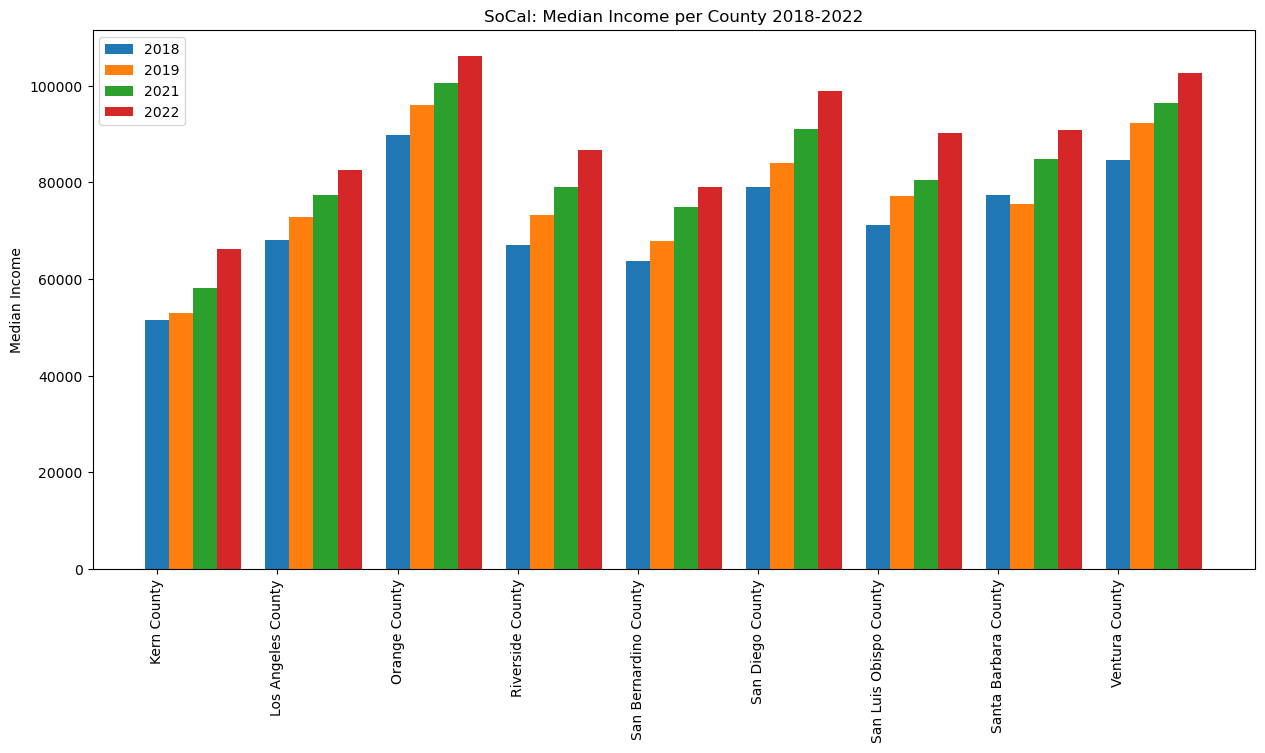

In [60]:
#Bar Chart - Socal: Median Income Per County 2018-2022
x_axis = np.arange(len(socal_df_2018))*1.5
labels = socal_df_2018['County']
plt.figure(figsize=(15,7))
plt.bar(x_axis, socal_df_2018['Median Income'], width=0.3)
plt.bar(x_axis+0.3, socal_df_2019['Median Income'], width=0.3)
plt.bar(x_axis+0.6, socal_df_2021['Median Income'], width=0.3)
plt.bar(x_axis+0.9, socal_df_2022['Median Income'], width=0.3)
plt.xticks(x_axis, labels, rotation='vertical');
plt.ylabel('Median Income')
plt.title('SoCal: Median Income per County 2018-2022')
plt.legend(['2018','2019','2021','2022'])

plt.savefig('../Madison/Images/socal_barchart_income.png')

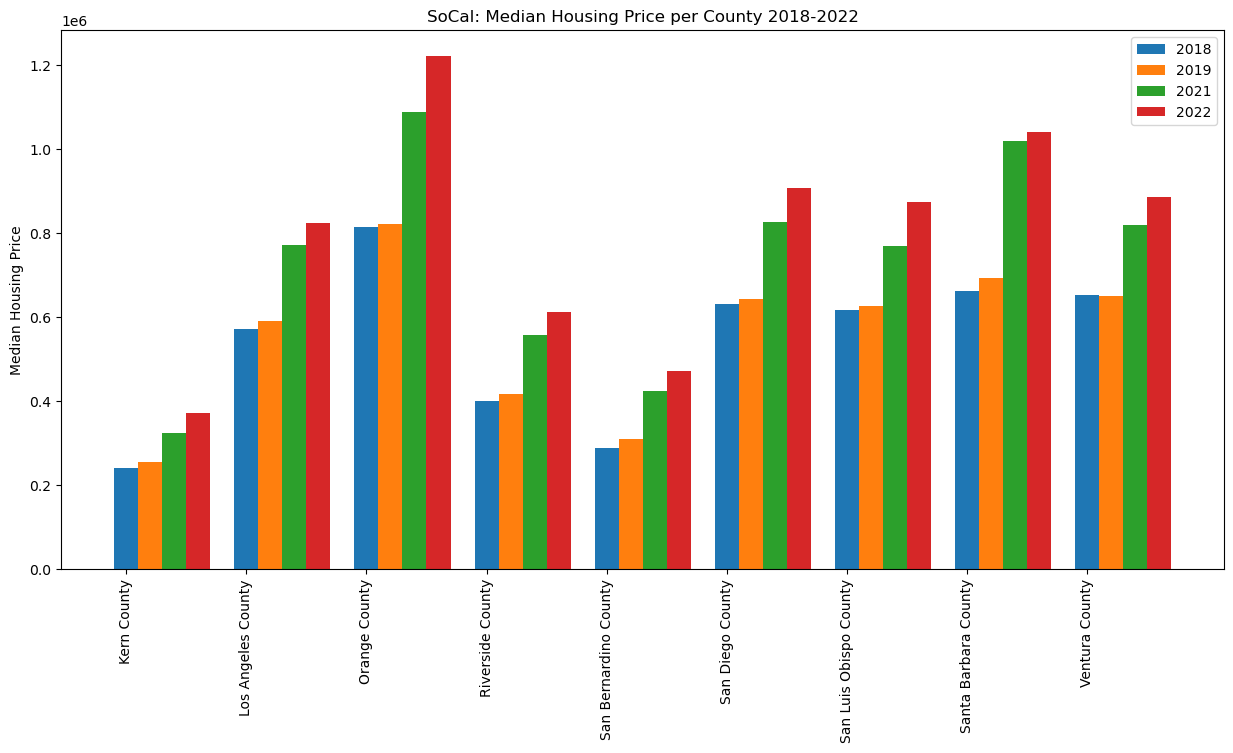

In [61]:

#Bar Chart - Socal: Median Income Per County 2018-2022
x_axis = np.arange(len(socal_df_2018))*1.5
labels = socal_df_2018['County']
plt.figure(figsize=(15,7))
plt.bar(x_axis, socal_df_2018['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.3, socal_df_2019['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.6, socal_df_2021['Median Housing Price'], width=0.3)
plt.bar(x_axis+0.9, socal_df_2022['Median Housing Price'], width=0.3)
plt.xticks(x_axis, labels, rotation='vertical');
plt.ylabel('Median Housing Price')
plt.title('SoCal: Median Housing Price per County 2018-2022')
plt.legend(['2018','2019','2021','2022'])

plt.savefig('../Madison/Images/socal_barchart_housingprice.png')